## Final Project Part 2
### IS 445 (Data Visualization)
### Group Members - Aastha Jain, Ayesha Kesharia, Dhruvesh Shah

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bqplot
import contextily as ctx
import ipywidgets
from bqplot import pyplot as bqplt


In [2]:
#importing data from a csv file into a dataframe
led = pd.read_csv('Life Expectancy Data.csv',na_values={'HepatitisB':0,
                                 'Totalexpenditure':0,
                                'GDP':0,
                                'Population':0,
                                 'Alcohol':0,
                                 'Incomecompositionofresources':0,
                                  'Schooling':0    })

In [3]:
led

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
#led.Year.astype('int32')
#led.Year=pd.to_datetime(led.Year, format='%Y')
#led['Year_extract'] = pd.DatetimeIndex(led['Year']).year#led['Year'].dt.year
#led['Year_extract'] = led['Year_extract'].astype('int')
#led

In [5]:
led[(led['Country']==led['Country'][0])& (led['Year'].between(2012,2015))]['Alcohol']

0    0.01
1    0.01
2    0.01
3    0.01
Name: Alcohol, dtype: float64

In [6]:
led2=led[led['Country']=='Afghanistan'] #trying to see how data looks when filtered based on country name
led2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [7]:
led.columns = led.columns.str.replace(' ', '') #removing white spaces from column names

In [8]:
led2.columns = led2.columns.str.replace(' ', '') #removing white spaces from column names

Some sample plots and data explorations

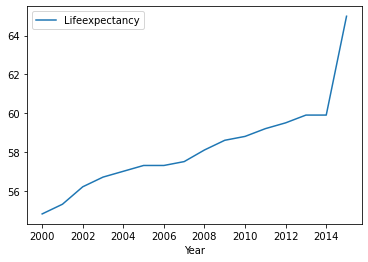

In [9]:
led2.plot(x='Year',y='Lifeexpectancy',kind='line') #creating basic plots on the filtered data

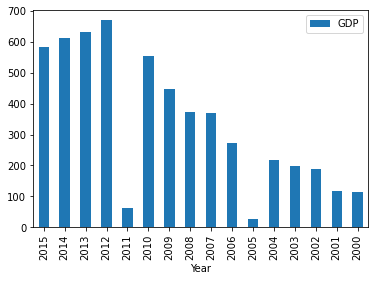

In [10]:
led2.plot(x='Year',y='GDP',kind='bar')#creating basic plots on the filtered data

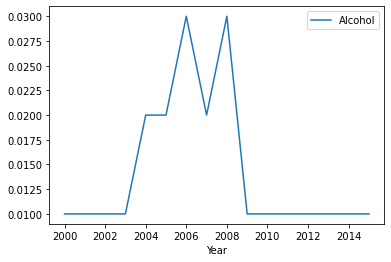

In [11]:
led2.plot(x='Year',y='Alcohol',kind='line')#creating basic plots on the filtered data

In [12]:
#led.plot(x='Country',y='Alcohol',kind='bar')

In [13]:
#finding out the unique country names so that we can populate them in the dropdown options
country_name = led['Country'].unique()

In [14]:
#creating a basic interactive plot using ipywidgets
@ipywidgets.interact(country=country_name)
def michigan_plot(country):
    led2=led[led['Country']==country]
    plt.plot(led2['Year'],led2['Alcohol'])
    plt.xlabel('Year') #defining the x label
    plt.ylabel('Alcohol consumption') #defining the y label
    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

In [15]:
#Scales
x_scb = bqplot.LinearScale()
y_scb = bqplot.LinearScale() 

#Axis
ax_xb  = bqplot.Axis(scale = x_scb, label = 'Year')
ax_yb  = bqplot.Axis(scale = y_scb, label = 'GDP', orientation = 'vertical')

#plotting a bar chart using bqplot
plot_bar=bqplot.Bars(x=led['Year'],y=led['GDP'], scales={'x':x_scb, 'y':y_scb})

#plotting the figure
figb = bqplot.Figure(marks = [plot_bar], axes = [ax_xb,ax_yb],background_style = {"fill":"lightgray"})


In [16]:
figb

Figure(axes=[Axis(label='Year', scale=LinearScale()), Axis(label='GDP', orientation='vertical', scale=LinearSc…

In [17]:
#myLabel=ipywidgets.Label()

In [18]:

#col_sc = bqplot.ColorScale(scheme='Red')
#x_sc = bqplot.LinearScale(max=max(led2['Year']), min=min(led['Year']))
#y_sc = bqplot.LinearScale(max=max(led2['Alcohol']), min=min(led['Alcohol']))

    
#Mark 
#lines = bqplt.plot(x=led2['Year'], y =led2['Alcohol'], scales={'x':x_sc,'y':y_sc})

#selector = bqplot.interacts.FastIntervalSelector(scale = x_sc, marks=[lines])


#Function 
    #def on_selection(change):
        #if len(change['owner'].selected==1):
            #i,j=change['owner'].selected#[0]
            

#Axes
            #col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
            #x_ax = bqplot.Axis(scale=x_sc, label='X')
           # y_ax = bqplot.Axis(scale=y_sc, label='Y')
        
        
        #linking bar plot and grid heatmap together
            #led_masking = led2[led2.index.str.contains(led2.index[i])]
            #led_masked = led2[led2['Year'] == led_masking.index.values[0]]
        #total_sq_footage= buildings_masked.groupby("Year Acquired")["Square Footage"].sum()
            #plot_bar.x = led2['Year']
            #plot_bar.y = led2['GDP']



#Calling the function created for interaction
    #lines.observe(on_selection,'selected')

# plotting grid heatmap
    #fig = bqplot.Figure(marks=[lines],axes=[col_ax, x_ax, y_ax],interaction=selector)

#Dashboard (with grid heatmap on left side and bar plot on right side)
#figures = ipywidgets.HBox([fig,figb])
#fig.layout.min_width='500px'  #figure size of grid heatmap
#figb.layout.min_width='500px' #figure size of bar plot
#myDashboard = ipywidgets.VBox([myLabel,figures])
#myDashboard

In [19]:
#checking the syntax for getting data from just one particular column from filtered dataset
led_test = led[led['Country']=='Afghanistan']['Alcohol'] 
led_test

0     0.01
1     0.01
2     0.01
3     0.01
4     0.01
5     0.01
6     0.01
7     0.03
8     0.02
9     0.03
10    0.02
11    0.02
12    0.01
13    0.01
14    0.01
15    0.01
Name: Alcohol, dtype: float64

In [20]:
country_name = led['Country'].unique() #getting all the unique country names from the dataset


Rough code and plots

In [21]:
#col_sc = bqplot.ColorScale(scheme='Red')
#x_sc = bqplot.LinearScale() #max=max(led['Year']), min=min(led['Year'])
#y_sc = bqplot.LinearScale() #max=max(led['Alcohol']), min=min(led['Alcohol'])

#col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
#x_ax = bqplot.Axis(scale=x_sc, label='X')
#y_ax = bqplot.Axis(scale=y_sc, label='Y')

#x_scb = bqplot.LinearScale()

#keeping y-scale static by adding minimum and maximum values
#y_scb = bqplot.LinearScale() 

#Scales
#ax_xb  = bqplot.Axis(scale = x_scb, label = 'Year')
#ax_yb  = bqplot.Axis(scale = y_scb, label = 'GDP', orientation = 'vertical')




#@ipywidgets.interact(country=country_name)
def led_plot(country):
    led2=led[led['Country']==country]
    bqplt.plot(led[led['Country']==country]['Year'],led[led['Country']==country]['Alcohol'])
    bqplt.xlabel('Year')
    bqplt.ylabel('Alcohol consumption')
    bqplt.show()



In [22]:
country_drop = ipywidgets.Dropdown(options=led['Country'].unique(), value = led['Country'].unique()[0])
country_drop

Dropdown(options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia'…

In [23]:
out = ipywidgets.interactive_output(led_plot, {'country': country_drop})

In [24]:
ipywidgets.VBox([ipywidgets.HBox([country_drop]), out])

In [25]:
led[(led['Country']==led['Country'][0])& (led['Year'].between(2012,2015))]['Alcohol'] #extracting data based on filter conditions

0    0.01
1    0.01
2    0.01
3    0.01
Name: Alcohol, dtype: float64

Creating 2 interactive plots that are linked via a dropdown box that has a list of unique country names

In [26]:
# create a dropdown menu for country
dropdown = ipywidgets.Dropdown(description='country', options=country_name)

# creating a figure for plotting Alcohol consumption
country_selected = dropdown.value
fig_title_tmpl = '"{}" Alcohol consumption analysis' # string template for title of the figure 
fig2 = bqplt.figure(title=fig_title_tmpl.format(country_selected))
fig2.layout.width = '500px'
line_alcohol = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Alcohol'])
bqplt.xlabel('Year')
bqplt.ylabel('Alcohol')

#creating a bar chart for Life expectancy
fig_title_tmpl = '"{}" Life Expectancy analysis' # string template for title of the figure 
fig3 = bqplt.figure(title=fig_title_tmpl.format(country_selected))
fig3.layout.width = '500px'
line_life = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Lifeexpectancy'])
bqplt.xlabel('Year')
bqplt.ylabel('Life Expectancy')

# 1. create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    country_selected = dropdown.value
    
    # update the y and x attribute of the mark by selecting the column from the led data frame
    #for first figure
    line_alcohol.y = led[led['Country']==country_selected]['Alcohol']
    line_alcohol.x = led[led['Country']==country_selected]['Year']
     # update the title of the figure based on the country name selected
    fig2.title = fig_title_tmpl.format(country_selected)
    
    #for second figure
    line_life.y = led[led['Country']==country_selected]['Lifeexpectancy']
    line_life.x = led[led['Country']==country_selected]['Year']
     # update the title of the second figure based on the country name selected
    fig3.title = fig_title_tmpl.format(country_selected)
    
    
#2. register the callback by using the observe method   
dropdown.observe(update_plot, 'value')


#3. Placing the figures on Dashboard
#place the figures horizontally
figures = ipywidgets.HBox([fig2,fig3])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([dropdown, figures])

Adding one more plot to the above dashboard and linking it to the dropdown

In [27]:
# create a dropdown menu for country
dropdown = ipywidgets.Dropdown(description='country', options=country_name)
x_sc = bqplot.LinearScale()

# create figure for plotting Alcohol consumption
country_selected = dropdown.value
fig_title_tmpl = '"{}" Alcohol consumption analysis' # string template for title of the figure 
fig2 = bqplt.figure(title=fig_title_tmpl.format(country_selected))
fig2.layout.width = '500px'
line_alcohol = bqplt.scatter(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Alcohol'])
bqplt.xlabel('Year')
bqplt.ylabel('Alcohol')

#creating a line chart for Life expectancy
fig_title_tmpl1 = '"{}" Life Expectancy analysis' # string template for title of the figure 
fig3 = bqplt.figure(title=fig_title_tmpl1.format(country_selected))
fig3.layout.width = '500px'
line_life = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Lifeexpectancy'])
bqplt.xlabel('Year')
bqplt.ylabel('Life Expectancy')

#creating a bar chart for GDP
fig_title_tmpl2 = '"{}" GDP analysis' # string template for title of the figure 
fig4 = bqplt.figure(title=fig_title_tmpl2.format(country_selected))
fig4.layout.width = '400px'
bar_GDP = bqplt.bar(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['GDP'])
bqplt.xlabel('Year')
bqplt.ylabel('GDP')

#create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    country_selected = dropdown.value
    
    # update the y and x attribute of the mark by selecting the column from the led data frame
    line_alcohol.y = led[led['Country']==country_selected]['Alcohol']
    line_alcohol.x = led[led['Country']==country_selected]['Year']
     # update the title of the first figure based on the country name selected
    fig2.title = fig_title_tmpl.format(country_selected)
    
    #for second figure
    line_life.y = led[led['Country']==country_selected]['Lifeexpectancy']
    line_life.x = led[led['Country']==country_selected]['Year']
     # update the title of the second figure based on the country name selected
    fig3.title = fig_title_tmpl1.format(country_selected)
    
    #for third figure
    bar_GDP.y = led[led['Country']==country_selected]['GDP']
    bar_GDP.x = led[led['Country']==country_selected]['Year']
     # update the title of the third figure based on the country name selected
    fig4.title = fig_title_tmpl2.format(country_selected)
    
    
#register the callback by using the observe method       
dropdown.observe(update_plot, 'value')


#Placing the figures on Dashboard
#place the figures horizontally
figures = ipywidgets.HBox([fig2,fig3,fig4])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([dropdown, figures])

Linking plot1 to plot3 and seeing if it functions properly. The third plot will display only a subset of data that corresponds to the highlighted portion in figure1. 

In [28]:
# create a dropdown menu for country
dropdown = ipywidgets.Dropdown(description='country', options=country_name)
x_sc = bqplot.LinearScale()

# create figure for plotting Alcohol consumption
country_selected = dropdown.value
fig_title_tmpl = '"{}" Alcohol consumption analysis' # string template for title of the figure 
fig2 = bqplt.figure(title=fig_title_tmpl.format(country_selected))
fig2.layout.width = '500px'
line_alcohol = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Alcohol'])
bqplt.xlabel('Year')
bqplt.ylabel('Alcohol')

#highlighting a region on figure 1 with a help of mouse cursor
intsel = bqplot.interacts.FastIntervalSelector(marks=[line_alcohol], scale=line_alcohol.scales['x'])
fig2.interaction =intsel

#creating a line chart for Life expectancy
fig_title_tmpl = '"{}" Life Expectancy analysis' # string template for title of the figure 
fig3 = bqplt.figure(title=fig_title_tmpl.format(country_selected))
fig3.layout.width = '500px'
line_life = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Lifeexpectancy'])
bqplt.xlabel('Year')
bqplt.ylabel('Life Expectancy')


#creating a bar chart for GDP
fig_title_tmpl2 = '"{}" GDP analysis' # string template for title of the figure 
fig4 = bqplt.figure(title=fig_title_tmpl2.format(country_selected))
fig4.layout.width = '400px'
bar_GDP = bqplt.bar(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['GDP'])
bqplt.xlabel('Year')
bqplt.ylabel('GDP')


#create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    country_selected = dropdown.value
    
    # update the y and x attribute of the mark by selecting the column from the led data frame
    line_alcohol.y = led[led['Country']==country_selected]['Alcohol']
    line_alcohol.x = led[led['Country']==country_selected]['Year']
     # update the title of the figure
    fig2.title = fig_title_tmpl.format(country_selected)
    
    #for second figure
    line_life.y = led[(led['Country']==country_selected)]['Lifeexpectancy']
    line_life.x = led[(led['Country']==country_selected)]['Year']
     # update the title of the second figure
    fig3.title = fig_title_tmpl.format(country_selected)

    #for third figure
    bar_GDP.y = led[led['Country']==country_selected]['GDP']
    bar_GDP.x = led[led['Country']==country_selected]['Year']
     # update the title of the third figure
    fig4.title = fig_title_tmpl2.format(country_selected)
    
#create a callback for adding the highlight interactivity in first graph
def select_plot(*args):
    try:
        #filtering the years which are highlighted in figure 1 in figure 3.
        bar_GDP.x = led[(led['Country']==country_selected)
                        & (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']
        bqplt.xlim(intsel.selected[0],intsel.selected[1])
       
    except TypeError:
        pass

#register the callback by using the 'observe' method
dropdown.observe(update_plot, 'value')
line_alcohol.observe(select_plot, 'selected')


#Placing the figures on Dashboard
#place the figures horizontally
figures = ipywidgets.HBox([fig2,fig3,fig4])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([dropdown, figures])


Rough plot and code to check out a few things

In [29]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

#3. axis (sometimes this can be #4 if we arent sure what mark to use)
x_ax = bqplot.Axis(scale=x_sc, label='X')
y_ax = bqplot.Axis(scale=y_sc, label='Y')
#fig_title_tmpl = '"{}" Alcohol consumption analysis' # string template for title of the figure 
#fig2 = bqplt.figure(title=fig_title_tmpl.format(country_selected))

#line_alcohol = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['Alcohol'])
line_alcohol = bqplot.Scatter(x=led[led['Country']==led['Country'][0]]['Year'], 
                              y =led[led['Country']==led['Country'][0]]['Alcohol'], 
                              scales={'x':x_sc,'y':y_sc})
bqplt.xlabel('Year')
bqplt.ylabel('Alcohol')

intsel = bqplot.interacts.FastIntervalSelector(marks=[line_alcohol], scale=x_sc)
fig2 = bqplot.Figure(marks=[line_alcohol],axes=[x_ax,y_ax],interaction=intsel)
fig2.layout.width = '500px'
#fig2.interaction =intsel

figures = ipywidgets.HBox([fig2])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([figures])

#i,j=intsel.selected
#i
#print(intsel.selected[0])
#print(intsel.selected[1])

In [30]:
#intsel.selected[0]

In [31]:
myLabel=ipywidgets.HTML("<h1>Life Expectancy Rate Analysis</h1>", 
                        layout=ipywidgets.Layout(height='auto',display="flex",justify_content="center"))
#ipywidgets.Label(value='Analysis', layout=ipywidgets.Layout(width='500px'))
#myLabel.value = 'Analysis'
# create a dropdown menu for country
dropdown = ipywidgets.Dropdown(description='country', options=country_name)
x_sc = bqplot.LinearScale()

# create figure for plotting Alcohol consumption
country_selected = dropdown.value
fig_title_tmpl = '"{}" Alcohol consumption analysis' # string template for title of the figure 
x_sc_line = bqplot.LinearScale()
y_sc_line = bqplot.LinearScale()
ax_x = bqplot.axes.Axis(scale = x_sc_line,tick_rotate=60,label='Year',tick_style={'font-size': 10})#,
                        #offset={'scale':x_sc_line, 'value':50})
ax_y = bqplot.axes.Axis(scale = y_sc_line,orientation='vertical',label='Alcohol')

line_alcohol = bqplt.plot(x=led[led['Country']==led['Country'][0]]['Year'],
                          y=led[led['Country']==led['Country'][0]]['Alcohol'],scales ={'x':x_sc_line,'y':y_sc_line},
                          padding=0.5)
fig2 = bqplt.figure(marks=[line_alcohol],title=fig_title_tmpl.format(country_selected),axes=[ax_x,ax_y]
                    ,background_style = {"fill":"lightyellow"})
fig2.layout.width = '325px'



#creating a line chart for Life expectancy
x_sc_life = bqplot.LinearScale()
y_sc_life = bqplot.LinearScale()
ax_x_life = bqplot.axes.Axis(scale = x_sc_life,tick_rotate=60,label='Year',tick_style={'font-size': 10})
ax_y_life = bqplot.axes.Axis(scale = y_sc_life,orientation='vertical',label='Life Expectancy')

fig_title_tmpl = '"{}" Life Expectancy analysis' # string template for title of the figure 
fig3 = bqplt.figure(title=fig_title_tmpl.format(country_selected))
fig3.layout.width = '600px'
line_life = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],
                       led[led['Country']==led['Country'][0]]['Lifeexpectancy'],scales ={'x':x_sc_life,'y':y_sc_life},
                          padding=0.5)
fig3 = bqplt.figure(marks=[line_life],title=fig_title_tmpl.format(country_selected),axes=[ax_x_life,ax_y_life]
                   ,background_style = {"fill":"lightyellow"})

intsel = bqplot.interacts.FastIntervalSelector(marks=[line_life], scale=line_life.scales['x'])
fig3.interaction =intsel


#creating a bar chart for GDP
fig_title_tmpl2 = '"{}" GDP analysis' # string template for title of the figure 
fig4 = bqplt.figure(title=fig_title_tmpl2.format(country_selected),background_style = {"fill":"lightyellow"})
fig4.layout.width = '375px'
bar_GDP = bqplt.bar(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['GDP'])
bqplt.xlabel('Year')
bqplt.ylabel('GDP')
#bqplt.xlim(2000,2020)

#create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    country_selected = dropdown.value
    
    # update the y and x attribute of the mark by selecting the column from the led data frame
    line_alcohol.y = led[led['Country']==country_selected]['Alcohol']
    line_alcohol.x = led[led['Country']==country_selected]['Year']
     # update the title of the figure
    fig2.title = fig_title_tmpl.format(country_selected)
    
    #for second figure
    line_life.y = led[(led['Country']==country_selected)]['Lifeexpectancy']
    line_life.x = led[(led['Country']==country_selected)]['Year']
     # update the title of the second figure
    fig3.title = fig_title_tmpl.format(country_selected)

    #for third figure
    bar_GDP.y = led[led['Country']==country_selected]['GDP']
    bar_GDP.x = led[led['Country']==country_selected]['Year']
     # update the title of the third figure
    fig4.title = fig_title_tmpl2.format(country_selected)
    
#create a callback for adding the highlight interactivity in first graph
def select_plot(*args):
    try:
        dropdown.observe(update_plot, 'value')
        country_selected = dropdown.value
       #filtering the years which are highlighted in figure 1 in figure 2.
        line_alcohol.y = led[(led['Country']==country_selected)]['Alcohol']
        line_alcohol.x = led[(led['Country']==country_selected) & 
                             (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']
        
        #filtering the years which are highlighted in figure 1 in figure 3.
        bar_GDP.y = led[led['Country']==country_selected]['GDP']
        bar_GDP.x = led[(led['Country']==country_selected)&
                        (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']

    except TypeError:
        pass

#register the callbacks by using the 'observe' method
dropdown.observe(update_plot, 'value')
line_life.observe(select_plot, 'selected')

#Placing the figures on Dashboard
#place the figures horizontally
figures = ipywidgets.HBox([fig3,fig2,fig4])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([myLabel,dropdown, figures])#,align_items='center')

## Final Dashboard

All three plots are linked to the dropdown option where we can filter on the country names. Plot 2 and Plot 3 are linked to plot 1. A subset corresponding to the highlighted data in plot 1 is displayed plots 2 and 3.
 
 For interactivity:
 1. Click on plot 1. 
 2. Then scroll up or down to expand or narrow down the highlighted subset of data. 
 3. Double click to lock and select the highlighted area. This would display the filtered data in the other two plots

In [32]:
#adding a title to the dashboard
myLabel=ipywidgets.HTML("<h1>Life Expectancy Prediction Analytics Dashboard</h1>", 
                        layout=ipywidgets.Layout(height='auto',display="flex",justify_content="center"))
#ipywidgets.Label(value='Analysis', layout=ipywidgets.Layout(width='500px'))


# create a dropdown menu for country
dropdown = ipywidgets.Dropdown(description='Select a Country', options=country_name)
dropdown.style.description_width = '500px'
dropdown.style.description_width = 'initial'
x_sc = bqplot.LinearScale()


# create figure for plotting Alcohol consumption
country_selected = dropdown.value
fig_title_alc = 'Alcohol consumption Rate' # string template for title of the figure 
#Scales
x_sc_line = bqplot.LinearScale()
y_sc_line = bqplot.LinearScale()
#Axis
ax_x = bqplot.axes.Axis(scale = x_sc_line,tick_rotate=60,label='Year',tick_style={'font-size': 10})
ax_y = bqplot.axes.Axis(scale = y_sc_line,orientation='vertical',label='Alcohol Consumption')
#Plot
line_alcohol = bqplt.plot(x=led[led['Country']==led['Country'][0]]['Year'],
                          y=led[led['Country']==led['Country'][0]]['Alcohol'],scales ={'x':x_sc_line,'y':y_sc_line},
                          padding=0.5)
#Figure
fig2 = bqplt.figure(marks=[line_alcohol],axes=[ax_x,ax_y],title=fig_title_alc
                    ,background_style = {"fill":"lightyellow"})
fig2.layout.width = '350px'



#creating a line chart for Life expectancy
#Scales
x_sc_life = bqplot.LinearScale()
y_sc_life = bqplot.LinearScale()
#Axis
ax_x_life = bqplot.axes.Axis(scale = x_sc_life,tick_rotate=60,label='Year',tick_style={'font-size': 10})
ax_y_life = bqplot.axes.Axis(scale = y_sc_life,orientation='vertical',label='Life Expectancy')
#Title
fig_title_tmpl = 'Life Expectancy Rate' # string template for title of the figure 
fig3 = bqplt.figure(title=fig_title_tmpl)
#Plot
line_life = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],
                       led[led['Country']==led['Country'][0]]['Lifeexpectancy'],scales ={'x':x_sc_life,'y':y_sc_life},
                          padding=0.5)
#Figure
fig3 = bqplt.figure(marks=[line_life],title=fig_title_tmpl,axes=[ax_x_life,ax_y_life]
                   ,background_style = {"fill":"lightyellow"})
fig3.layout.width = '400px'
#Adding interactivity of highlighting a portion of the plot while hovering over the graph
intsel = bqplot.interacts.FastIntervalSelector(marks=[line_life], scale=line_life.scales['x'])
fig3.interaction =intsel


#creating a bar chart for GDP
fig_title_tmpl2 = 'GDP Rate' # string template for title of the figure 
#Figure
fig4 = bqplt.figure(title=fig_title_tmpl2,background_style = {"fill":"lightyellow"})
fig4.layout.width = '500px'
#Plot
bar_GDP = bqplt.bar(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['GDP'])
#Labels
bqplt.xlabel('Year')
bqplt.ylabel('GDP')


#create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    country_selected = dropdown.value
    
    # update the y and x attribute of the mark by selecting the column from the led data frame
    line_alcohol.y = led[led['Country']==country_selected]['Alcohol']
    line_alcohol.x = led[led['Country']==country_selected]['Year']
     
    #for second figure
    line_life.y = led[(led['Country']==country_selected)]['Lifeexpectancy']
    line_life.x = led[(led['Country']==country_selected)]['Year']
    
    #for third figure
    bar_GDP.y = led[led['Country']==country_selected]['GDP']
    bar_GDP.x = led[led['Country']==country_selected]['Year']
  
    
#create a callback for adding the highlight interactivity in first graph
def select_plot(*args):
    #moving the entire code into try except block, so that highlight interactivity logic works correctly
    try:
        #filtering data based on country selected
        dropdown.observe(update_plot, 'value')
        country_selected = dropdown.value
        
       #filtering the years which are highlighted in figure 1 in figure 2.
        line_alcohol.y = led[(led['Country']==country_selected)]['Alcohol']
        line_alcohol.x = led[(led['Country']==country_selected) & 
                             (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']
        
        #filtering the years which are highlighted in figure 1 in figure 3.
        bar_GDP.y = led[led['Country']==country_selected]['GDP']
        bar_GDP.x = led[(led['Country']==country_selected)&
                        (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']

    except TypeError:
        pass

#register the callbacks by using the 'observe' method
dropdown.observe(update_plot, 'value')
line_life.observe(select_plot, 'selected')

#Placing the figures on Dashboard
#place the figures horizontally
figures = ipywidgets.HBox([fig3,fig2,fig4])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([myLabel,dropdown, figures])

In [33]:
led['AdultMortality_Category'] = pd.Categorical(np.zeros(len(led.index)), categories=[ '0 to 100', '100 to 200', '200 to 300', '300 to 400', '400 to 500', '500 to 600', '600 to 700', '700 to 800'])
led['AdultMortality_Category'][led.AdultMortality.between(0,100)] = '0 to 100'
led['AdultMortality_Category'][led.AdultMortality.between(100,200)] = '100 to 200'
led['AdultMortality_Category'][led.AdultMortality.between(200,300)] = '200 to 300'
led['AdultMortality_Category'][led.AdultMortality.between(300,400)] = '300 to 400'
led['AdultMortality_Category'][led.AdultMortality.between(400,500)] = '400 to 500'
led['AdultMortality_Category'][led.AdultMortality.between(500,600)] = '500 to 600'
led['AdultMortality_Category'][led.AdultMortality.between(600,700)] = '600 to 700'
led['AdultMortality_Category'][led.AdultMortality.between(700,800)] = '700 to 800'

led

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,AdultMortality_Category
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,200 to 300
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,200 to 300
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,200 to 300
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,200 to 300
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,200 to 300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,700 to 800
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,700 to 800
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0 to 100
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,600 to 700


In [34]:
year = ipywidgets.IntSlider(min=2000, max=2015, step=1)
year.style.description_width = '500px'
year.style.description_width = 'initial'

#dropdown = ipywidgets.Dropdown(description='Select a Country', options=country_name)
#dropdown.style.description_width = '500px'
#dropdown.style.description_width = 'initial'

dropdown_status = ipywidgets.Dropdown(description='Select a Status of Country', options=['Developing','Developed'])
dropdown_status.style.description_width = '500px'
dropdown_status.style.description_width = 'initial'

In [35]:
#adding widgets for x-axis column and number of bins
@ipywidgets.interact(Status_of_Country=dropdown_status,Year = year)

#creating a function to plot an interactive plot with customisable x columns and customisable number of bins for numerical columns
def plot_per_year(Status_of_Country,Year):
    led_year=led[ (led['Status']==Status_of_Country)&(led['Year']==Year)]#
    led_fltr=led_year.groupby("AdultMortality_Category")["Lifeexpectancy"].mean()
    led_fltr.plot(x=led_fltr.index,y=led_fltr.values,kind='bar')
    plt.xlabel("AdultMortality_Category")
    plt.ylabel("Lifeexpectancy")
    
    
plt.show()

interactive(children=(Dropdown(description='Select a Status of Country', options=('Developing', 'Developed'), …

In [37]:
#contextual visualization 3
#UK dataset

uk_led = pd.read_csv('life-expectancy-1.csv')
uk_led.head()

,OrganisationLabel,OrganisationURI,PublishedDate,DurationFrom,DurationTo,LatestData,ReportingPeriod,GeoEntityName,GeoCode,GeoName,GeoURI,FemaleLifeExpectancy,MaleLifeExpectancy
0,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2019-12-11T00:00:00,2016-01-01T00:00:00,2018-12-31T23:59:59,True,2016-2018,County,E10000019,Lincolnshire,http://statistics.data.gov.uk/doc/statistical-...,82.9,79.2
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2019-12-11T00:00:00,2016-01-01T00:00:00,2018-12-31T23:59:59,True,2016-2018,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,82.1,77.8
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2019-12-11T00:00:00,2016-01-01T00:00:00,2018-12-31T23:59:59,True,2016-2018,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,82.0,77.8
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2019-12-11T00:00:00,2016-01-01T00:00:00,2018-12-31T23:59:59,True,2016-2018,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,80.5,77.3
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2019-12-11T00:00:00,2016-01-01T00:00:00,2018-12-31T23:59:59,True,2016-2018,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,84.1,80.7


In [53]:
pip install seaborn

     |████████████████████████████████| 292 kB 2.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


82.39326923076922
78.65096153846154


Text(0, 0.5, 'Life Expectancy')

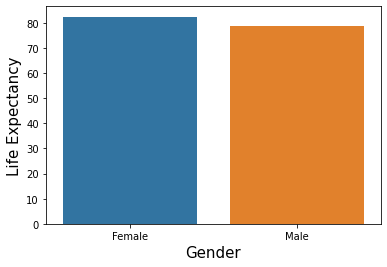

In [57]:
#bar chart showing avg life expectancy of men and women in UK
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = uk_led["FemaleLifeExpectancy"].mean()
print(df)

df1 = uk_led["MaleLifeExpectancy"].mean()
print(df1)

gender_le=[]
gender_le.append(df)
gender_le.append(df1)
gender_le

Gender=["Female","Male"]

b = sns.barplot(x = Gender,y= gender_le)

b.set_xlabel("Gender", fontsize = 15)
b.set_ylabel("Life Expectancy" , fontsize = 15)

In [60]:
#global life expectancy 

global_led = pd.read_csv('Global Life Expectancy.csv')

global_led.columns = global_led.columns.str.replace(' ', '')
global_led.head()

,RegionsandCountries,LifeExpectancyFemaleAtBirth1990,LifeExpectancyFemaleAtBirth1990LowerBound,LifeExpectancyFemaleAtBirth1990UpperBound,HALEFemaleAtBirth1990,HALEFemaleAtBirth1990LowerBound,HALEFemaleAtBirth1990UpperBound,LifeExpectancyMaleAtBirth1990,LifeExpectancyMaleAtBirth1990LowerBound,LifeExpectancyMaleAtBirth1990UpperBound,...,HALEBothAt652006UpperBound,LifeExpectancyBothAtBirth2016,LifeExpectancyBothAtBirth2016LowerBound,LifeExpectancyBothAtBirth2016UpperBound,HALEBothAtBirth2016,HALEBothAtBirth2016LowerBound,HALEBothAtBirth2016UpperBound,HALEBothAt652016,HALEBothAt652016LowerBound,HALEBothAt652016UpperBound
0,Global,67.57,67.33,67.77,58.42,55.80,60.77,62.70,62.42,62.99,...,13.04,72.48,72.10,72.83,63.12,60.42,65.48,12.91,11.75,13.96
1,High SDI,79.15,79.05,79.24,68.23,65.08,71.02,72.32,72.21,72.44,...,15.61,80.74,80.59,80.91,69.94,66.85,72.70,15.20,13.85,16.41
2,High-middle SDI,73.54,73.16,73.92,63.64,60.78,66.23,66.44,65.99,66.90,...,12.99,76.44,75.59,77.16,66.73,63.87,69.32,13.26,11.98,14.42
3,Middle SDI,68.75,68.41,69.09,60.16,57.68,62.37,64.15,63.79,64.50,...,12.57,74.00,73.71,74.28,65.09,62.49,67.30,12.58,11.51,13.54
4,Low-middle SDI,60.39,59.94,60.81,51.69,49.11,53.94,58.41,57.92,58.90,...,10.96,68.18,67.68,68.61,58.96,56.29,61.32,10.77,9.72,11.69


In [87]:
global_led=pd.read_csv("life-expectancy-at-birth-oecd.csv")
global_led
global_led.columns = global_led.columns.str.replace(' ', '')
global_led

df= global_led[]

,Entity,Code,Year,LifeExpectancy(OECD)
0,Australia,AUS,1960,70.9
1,Australia,AUS,1961,71.2
2,Australia,AUS,1962,71.0
3,Australia,AUS,1963,71.1
4,Australia,AUS,1964,70.7
...,...,...,...,...
2233,United States,USA,2011,78.7
2234,United States,USA,2012,78.8
2235,United States,USA,2013,78.8
2236,United States,USA,2014,78.9


In [90]:
newdf = global_led[(global_led.Entity == "United States")]
newdf

,Entity,Code,Year,LifeExpectancy(OECD)
2182,United States,USA,1960,69.9
2183,United States,USA,1961,70.4
2184,United States,USA,1962,70.2
2185,United States,USA,1963,70.0
2186,United States,USA,1964,70.3
2187,United States,USA,1965,70.3
2188,United States,USA,1966,70.3
2189,United States,USA,1967,70.7
2190,United States,USA,1968,70.4
2191,United States,USA,1969,70.6


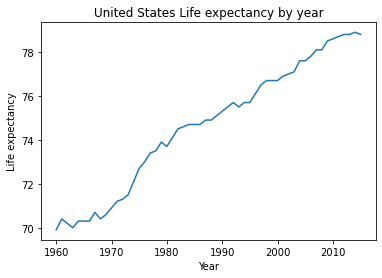

<Figure size 1440x1440 with 0 Axes>

In [92]:

plt.plot(newdf['Year'],newdf['LifeExpectancy(OECD)'])
plt.title('United States Life expectancy by year')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.figure(figsize=(20,20)) # this creates a figure 8 inch wide, 4 inch high

plt.show()


In [93]:
alcohol_led=pd.read_csv("drinks_solution.csv")
alcohol_led
#global_led.columns = global_led.columns.str.replace(' ', '')
#global_led


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.3
4,Angola,217,57,45,5.7
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,1.0


In [105]:
alcohol = alcohol_led[(alcohol_led.country == "USA")]
alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
185,USA,249,158,84,8.7


Text(0, 0.5, 'Consumption in the US')

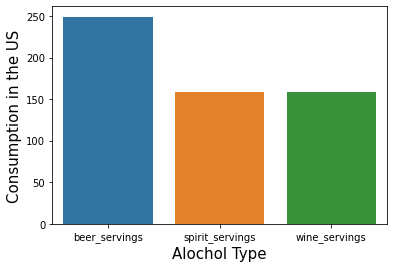

In [110]:
import pandas as pd
Alcohol=["beer_servings","spirit_servings","wine_servings"]
Country= ["USA"]
result=[]
v1=alcohol._get_value(185,'beer_servings')
v2=alcohol._get_value(185,'spirit_servings')
v3=alcohol._get_value(185,'wine_servings')
result.append(v1)
result.append(v2)
result.append(v2)

b = sns.barplot(x = Alcohol,y= result)

b.set_xlabel("Alochol Type", fontsize = 15)
b.set_ylabel("Consumption in the US" , fontsize = 15)

### Explanation
The dashboard here shows us three different plots based on the country the user selects. The user is first given an option to choose the country from the drop down list. Here the country list is taken from the dataset. Once the user selects the country, he or she is shown three different plots of that country from the dataset we used. The first plot is the life expectancy vs year plot, which shows the Life expectancy of the country the user has chosen from the dropdown for all the years in the dataset. Now if the user was to highlight a particular area on the plot , the user can simply do that by hovering over the first plot and selecting the area he or she desires. The user can expand the area by moving the arrow up on the plot and decrease it by moving it down. On doing this the other plots will also be updated showing us the same timeline the user selected in the first plot. The second plot is the alcohol consumption plot per year. The third plot is the country's GDP per year. So on selecting the Life expectancy of one particular year for a country from the first plot and the dropdown, the second and the third plot will also get updated according to the country and the timeline selected.

### Contextual Data sets
1) Alcohol vs Life expectancy -

Source : https://data.world/databeats/alcohol-vs-life-expectancy

This dataset explores the alcohol content consumed by each country along with the type of alcohol consumed. I think this can be a good fit in our dataset which can help us analyze which type of alcohol is affecting life expectancy the most. 

2) Life expectancy -

Source : https://data.world/datagov-uk/27cb8743-a623-424c-b097-12c398697828

This dataset is particularly of the UK and shows the life expectancy of the country during particular periods. It also show us the life expectancy of men and female separately which I believe can extremely helpful in our analysis.

3) Global life expectancy -

Source : https://data.world/johnsnowlabs/global-life-expectancy-and-healthy-life-expectancy/workspace/file?filename=Global+Life+Expectancy+and+Healthy+Life+Expectancy.csv

This dataset is very helpful in analyzing and verifying the GDP and economic aspect of the countries we used in our dataset. It tells us about the life expectancy of the different strata of society - upper, middle and lower class that can definitely help us in our analysis.

### Learnings

I have learnt data exploration and data transformations fromt this part of the project. I have also learnt how to make a highly interactive dashboard using Python. The part of linking the plots together and making them alive was complicated but very interesting to learn and implement. I learnt how to make the best use of the data available from Aastha, who gave us the idea about the dashboard after severe brainstorming. We initially had difficulties figuring out which columns of the dataset to connect, but Aastha’s idea of using the country as the dropdown worked really well. I have learnt data exploration, data cleaning and data transformations from Dhruvesh. He also brainstormed in figuring out the code to add an additional feature of selecting country names from the dropdown to the dashboard. The user can select a country whose life expectancy he/she is trying to analyse. Based on the selection, a subset of the data is plotted on the three graphs.


### Plan of action for Final Project Part 3
During part 3 of the final project, we plan to divide the work of creating one contextual and as well as one interactive visualization each between 3 group members. Aastha will take up the Alcohol vs Life expectancy contextual visualization which will explore the alcohol content consumed by each country along with the type of alcohol consumed. We think this can be a good fit for our dataset as it can help us analyze which type of alcohol is affecting life expectancy the most. Ayesha will look into a new dataset showing the life expectancy of the UK as this dataset shows the life expectancy of the country during particular periods. It also shows us the life expectancy of men and female separately which we believe can be extremely helpful in our analysis. Dhruvesh will take over the Global life expectancy visualization as this dataset is very helpful in analyzing and verifying the GDP and economic aspects of the countries we used in our dataset. It tells us about the life expectancy of the different strata of society - upper, middle, and lower class that can definitely help us in our analysis. For our interactive visualization, we plan to analyze the effect of population on the life expectancy of various countries as this will help us produce meaningful insights. 

The above-mentioned visualizations, as well as part 2 visualizations, will be combined to build and explain the story based on different trends of life expectancy with respect to various factors like alcohol, population, GDP etc, and will be hosted using the platforms required in part 3 of the final project.
The flow of the project will include each member of the team coming up with these contextual and interactive visualizations along with the write up so that we can gain fresh perspectives and deliver high-quality output.

### References:

https://notebook.community/bloomberg/bqplot/examples/Tutorials/Linking%20Plots%20With%20Widgets

https://www.codegrepper.com/code-examples/python/pandas+filter+by+value+range

https://notebook.community/bloomberg/bqplot/examples/Tutorials/Fast%20Interval%20Selector

https://bqplot.readthedocs.io/en/latest/_generate/bqplot.pyplot.bar.html

https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek06%2FinClass_week06.ipynb

https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek05%2FinClass_week05.ipynb

https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2FinClass_week07.ipynb

https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek06%2Fprep_notebook_week06.ipynb

https://www.programcreek.com/python/example/90667/ipywidgets.Label

https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Example.html

https://bqplot.readthedocs.io/en/latest/_generate/bqplot.axes.Axis.html